In [ ]:
# 개와 고양이 분류 실습 문제
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [ ]:
# 파일 받아서 압축 풀기

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2021-02-26 03:57:34--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.46.53.60, 2600:1408:5c00:396::e59, 2600:1408:5c00:3ad::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.46.53.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M  78.1MB/s    in 9.3s    

2021-02-26 03:57:43 (84.2 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [ ]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

# Expected Output:
# 12501
# 12501

12501
12501


In [144]:
# os.mkdir 이용하여, 사진 저장할 다음 디렉토리 만들기 

try:
  os.mkdir('/tmp/cats-v-dogs')
  os.mkdir('/tmp/cats-v-dogs/training')
  os.mkdir('/tmp/cats-v-dogs/testing')
  os.mkdir('/tmp/cats-v-dogs/training/cats')
  os.mkdir('/tmp/cats-v-dogs/training/dogs')
  os.mkdir('/tmp/cats-v-dogs/testing/cats')
  os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [ ]:
origin_img_cat = '/tmp/PetImages/Cat'
origin_img_dog = '/tmp/PetImages/Dog'


In [141]:
#!rm -Rf /tmp/cats-v-dogs
# 수틀리면 지워 

In [170]:
# 랜덤하게 만들기 테스트
my_list = [ 1,2,3,4,5]
random.sample(my_list, len(my_list))

[3, 2, 1, 4, 5]

In [157]:
import numpy as np

최대한 단순하게 생각해서 규칙을 찾아내자!

In [164]:
my_nlist = np.arange(9)
SPLIT_RATIO = 0.9

In [165]:
my_nlist

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [166]:
# 전체 길이에서 SPLIT_RATIO(0.9)를 곱하면 90%가 된다
my_nlist[ 0: int(len(my_nlist) * SPLIT_RATIO ) ]

array([0, 1, 2, 3, 4, 5, 6, 7])

In [167]:
my_nlist[ int(len(my_nlist) * SPLIT_RATIO ) : ]

array([8])

In [142]:
# 다음 함수를 완성하시오.

# 먼저 파일들을 잘 섞은 후,
# 트레이닝은 90%, 테스트는 10%로 파일을 나눕니다.
# 그리고 파일의 사이즈가 0이 아니면, 
# 그 파일을 트레이닝 또는 테스트 디렉토리에 실제로 저장을 합니다.

# 아래 함수들을 참고하여, 위의 절차대로 프로그래밍 하세요.
#
# os.listdir(DIRECTORY) 디렉토리에 있는 파일 리스팅
# os.path.getsize(PATH) 파일 사이즈 확인
# copyfile(source, destination) 원하는 디렉토리로 파일 복사
# random.sample(list, len(list)) 리스트를 섞는다.(파일명 섞기)

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  # 사이즈
  size = os.path.getsize( SOURCE)
  
  # 랜덤 리스트
  random_list = random.sample(os.listdir(SOURCE) , len(os.listdir(SOURCE) ))
  
  split = (len(random_list) * SPLIT_SIZE )
  train_image = random_list[ 0 : int(split) ] #90
  test_image = random_list[int(split): ] #10
  
  for one_image in test_image:
    if os.path.getsize( SOURCE + one_image ) > 0 :
      copyfile(SOURCE + one_image, TESTING + one_image)
    else:
      print('파일이 없거나, 복사가 완료')

  for one_image in train_image:
    if os.path.getsize( SOURCE + one_image ) > 0 :
      copyfile(SOURCE + one_image, TRAINING + one_image)
    else:
      print('파일이 없습니다')
 


In [145]:
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)


파일이 없습니다
파일이 없습니다


In [146]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

# 실행하면 아래처럼 나올것이다 :
# 11250
# 11250
# 1250
# 1250

11249
11249
1251
1251


In [147]:
from keras.layers import Conv2D, MaxPooling2D

In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [173]:
# 분류 모델 작성하기. 적어도 3개의 컨볼루션 사용하기.
model = tf.keras.models.Sequential([
  Conv2D(filters= 16, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3) ),
  MaxPooling2D(2, 2),
  Conv2D(filters= 32, kernel_size=(3,3), activation='relu' ),
  MaxPooling2D(2, 2),
  Conv2D(filters= 64, kernel_size=(3,3), activation='relu' ),
  MaxPooling2D(2, 2),
  # DNN 하기
  Flatten(),
  Dense(units=512, activation='relu'),
  Dense(units=1, activation='sigmoid') 
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [152]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [172]:
TRAINING_DIR = '/tmp/cats-v-dogs/training'
train_datagen = ImageDataGenerator( rescale=1 / 255.0)
# 제너레이터의 배치 사이즈는 꼭 10으로 하세요. (성능이 안 좋을 때 10씩, 한번에 10씩 메모리에 올림, 성능 좋은 컴퓨터는 더해도 된다고함)
train_generator = train_datagen.flow_from_directory( 
    TRAINING_DIR, batch_size = 10, target_size= (150, 150), class_mode='binary'
    )
# class_mode =binary는 2개로 분류하는 문제

VALIDATION_DIR = '/tmp/cats-v-dogs/testing'
validation_datagen  = ImageDataGenerator( rescale= 1 / 255.0)
validation_generator = validation_datagen.flow_from_directory( 
    VALIDATION_DIR, batch_size = 10, target_size= (150, 150), class_mode='binary'
    )

# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22496 images belonging to 2 classes.
Found 2502 images belonging to 2 classes.


In [174]:
history = model.fit(train_generator, epochs=15, verbose=1, validation_data=validation_generator)
# 실행한다.

Epoch 1/15
 961/2250 [===========>..................] - ETA: 40s - loss: 0.7081 - accuracy: 0.6092

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

2250/2250 [==============================] - 77s 34ms/step - loss: 0.6501 - accuracy: 0.6505 - val_loss: 0.4522 - val_accuracy: 0.7838
Epoch 2/15
2250/2250 [==============================] - 77s 34ms/step - loss: 0.4817 - accuracy: 0.7757 - val_loss: 0.4605 - val_accuracy: 0.7786
Epoch 3/15
2250/2250 [==============================] - 77s 34ms/step - loss: 0.4337 - accuracy: 0.8090 - val_loss: 0.3939 - val_accuracy: 0.8317
Epoch 4/15
2250/2250 [==============================] - 77s 34ms/step - loss: 0.4176 - accuracy: 0.8234 - val_loss: 0.4080 - val_accuracy: 0.8305
Epoch 5/15
2250/2250 [==============================] - 78s 35ms/step - loss: 0.3996 - accuracy: 0.8330 - val_loss: 0.4758 - val_accuracy: 0.7714
Epoch 6/15
2250/2250 [==============================] - 79s 35ms/step - loss: 0.3895 - accuracy: 0.8394 - val_loss: 0.4031 - val_accuracy: 0.8237
Epoch 7/15
2250/2250 [==============================] - 78s 35ms/step - loss: 0.3891 - accuracy: 0.8444 - val_loss: 0.4007 - val_accura

Text(0.5, 1.0, 'Training and validation loss')

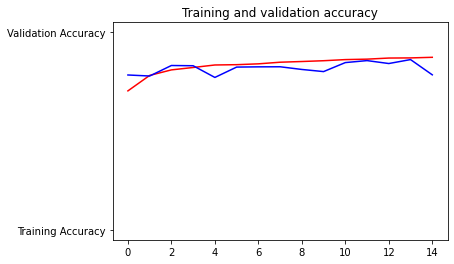

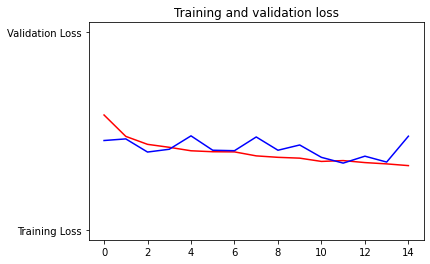

In [175]:
# LOSS 와 ACCURACY 에 대한 차트를 그린다. 그냥 실행하시오!
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')



In [ ]:
# 학습이 잘 됨
# 학습이 잘 된 것은 Val_accuracy가 잘 된 것, 트레이닝 정확도는 중요치 않다. 
# 새로운 데이터나 테스트데이터를 잘 맞춰야 학습이 잘 된 것.

# 오버피팅은 트레이닝 학습데이터만 계속 학습이 되어서 새로운 테이터나 못 맞추고, 트레이닝 셋만 잘 맞춤


In [ ]:
# 이미지를 업로드 하여, 위에서 만든 모델을 테스트 해보자.

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(# YOUR CODE HERE))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")